# Dimensionality Reduction: Principal Component Analysis in-depth

- Based on the work of *Jake VanderPlas - Source available on [github](http://github.com/jakevdp/ESAC-stats-2014)*

Here we'll explore **Principal Component Analysis**, which is an extremely useful linear dimensionality reduction technique.

We'll start with our standard set of initial imports:

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import os 
# use seaborn plotting defaults
# If this causes an error, you can comment it out.
import seaborn as sns
sns.set()

### Application of PCA to Dubya

This might seem a bit strange in two dimensions, but the projection and dimensionality reduction can be extremely useful when visualizing high-dimensional data.  Let's take a quick look at the application of PCA to pictures of GWB.

In [4]:
%%bash
rm -r gwb_cropped* __MACOSX
wget http://www.maths.lth.se/matematiklth/personal/solem/downloads/gwb_cropped.zip
unzip gwb_cropped.zip

Archive:  gwb_cropped.zip
   creating: gwb_cropped/
  inflating: gwb_cropped/.DS_Store   
   creating: __MACOSX/
   creating: __MACOSX/gwb_cropped/
  inflating: __MACOSX/gwb_cropped/._.DS_Store  
  inflating: gwb_cropped/George_W_Bush_0001.jpg  
  inflating: gwb_cropped/George_W_Bush_0006.jpg  
  inflating: __MACOSX/gwb_cropped/._George_W_Bush_0006.jpg  
  inflating: gwb_cropped/George_W_Bush_0009.jpg  
  inflating: __MACOSX/gwb_cropped/._George_W_Bush_0009.jpg  
  inflating: gwb_cropped/George_W_Bush_0015.jpg  
  inflating: __MACOSX/gwb_cropped/._George_W_Bush_0015.jpg  
  inflating: gwb_cropped/George_W_Bush_0025.jpg  
  inflating: __MACOSX/gwb_cropped/._George_W_Bush_0025.jpg  
  inflating: gwb_cropped/George_W_Bush_0027.jpg  
  inflating: __MACOSX/gwb_cropped/._George_W_Bush_0027.jpg  
  inflating: gwb_cropped/George_W_Bush_0031.jpg  
  inflating: __MACOSX/gwb_cropped/._George_W_Bush_0031.jpg  
  inflating: gwb_cropped/George_W_Bush_0035.jpg  
  inflating: __MACOSX/gwb_cropped/._Ge

rm: cannot remove ‘gwb_cropped*’: No such file or directory
rm: cannot remove ‘__MACOSX’: No such file or directory
--2016-02-18 11:11:03--  http://www.maths.lth.se/matematiklth/personal/solem/downloads/gwb_cropped.zip
Resolving www.maths.lth.se (www.maths.lth.se)... 130.235.2.41
Connecting to www.maths.lth.se (www.maths.lth.se)|130.235.2.41|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41031 (40K) [application/zip]
Saving to: ‘gwb_cropped.zip’

     0K .......... .......... .......... ..........           100% 54.7K=0.7s

2016-02-18 11:11:05 (54.7 KB/s) - ‘gwb_cropped.zip’ saved [41031/41031]



In [5]:
cd gwb_cropped/

/home/budamels/Uniandes/Metodos commputacionales/GitHub profe/gwb_cropped


In [6]:
rm .DS_Store

In [7]:
npics=len(os.listdir('.'))

In [8]:
import os
from PIL import Image
f=Image.open(os.listdir('.')[0])
im=np.array(f)
ima=im.flatten()
bush=np.zeros([npics,ima.shape[0]])
bushim=np.zeros([npics,im.shape[0],im.shape[1]])
k=0
for i in os.listdir('.'):
    if i.endswith(".jpg"):
        f=Image.open(i)
        ima=np.array(f)
        bush[k]=ima.flatten()
        bushim[k]=ima
        k=k+1
        continue

In [9]:
y=np.arange(k)
y

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [10]:
bushim.shape

(20, 105, 80)

(105, 80)

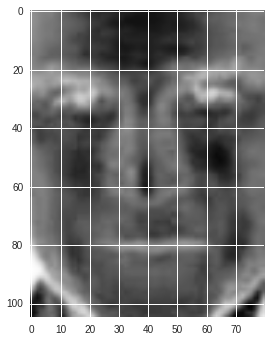

In [11]:
plt.imshow(bushim[19])
bushim[19].shape

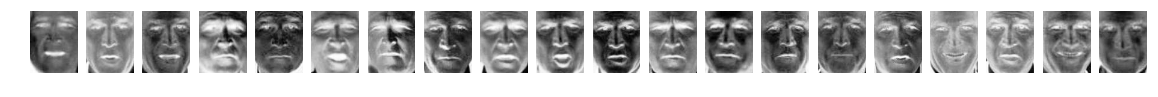

In [12]:
images_and_labels = list(zip(bushim, y))
plt.figure(figsize=(20,10))
for index, (image, label) in enumerate(images_and_labels[:npics]):
    plt.subplot(2, npics, index + 1)
    plt.axis('off')
    plt.imshow(image)

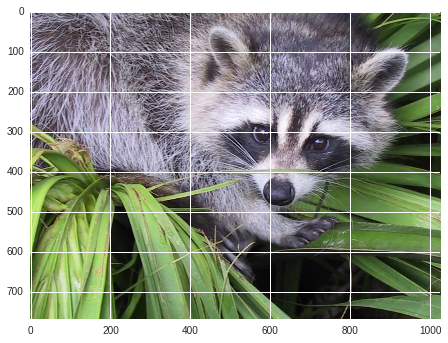

In [13]:
from scipy import misc
f = misc.face()
plt.imshow(f)
plt.show()

In [14]:
print ima.shape
ima

(105, 80)


array([[123, 125, 127, ..., 132, 133, 134],
       [122, 124, 127, ..., 135, 136, 137],
       [121, 123, 126, ..., 138, 140, 141],
       ..., 
       [200, 198, 183, ..., 142,  99,  74],
       [203, 204, 188, ..., 125,  86,  67],
       [204, 194, 179, ..., 111,  72,  54]], dtype=uint8)

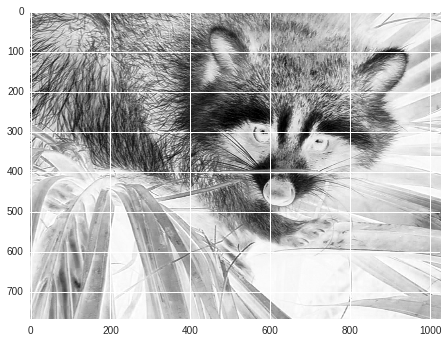

In [15]:
ima=np.array(f)
plt.imshow(ima[:,:,2])

In [18]:
from sklearn.decomposition import PCA
pca = PCA(0.95)  # project from 8400 to 2 dimensions
Xproj = pca.fit_transform(bush)
print(bush.shape)
print(Xproj.shape)

(20, 8400)
(20, 13)


In [19]:
print pca.explained_variance_ratio_.sum(axis=0)
pca.explained_variance_ratio_

0.951994067782


array([ 0.40332758,  0.15803241,  0.08642008,  0.06995787,  0.04809312,
        0.04261167,  0.03358129,  0.0290181 ,  0.0227988 ,  0.01920478,
        0.01438347,  0.01302861,  0.01153628])

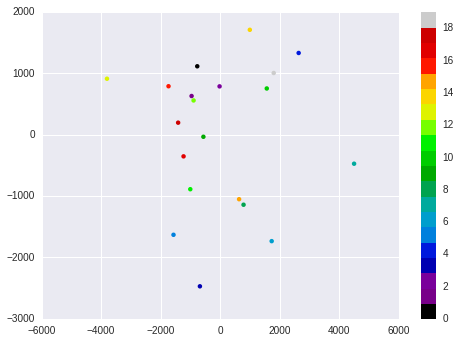

In [20]:
plt.scatter(Xproj[:, 0], Xproj[:, 1], c=y, edgecolor='none', alpha=1,
            cmap=plt.cm.get_cmap('nipy_spectral', npics))
plt.colorbar();

This gives us an idea of the relationship between the digits. Essentially, we have found the optimal rotation in 64-dimensional space that allows us to see the layout of the digits, **without reference** to the labels.

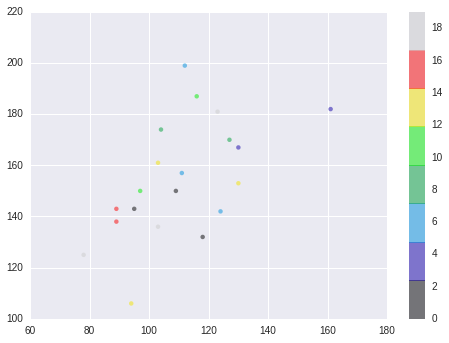

In [21]:
plt.scatter(bush[:,0], bush[:,100], c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 8))
plt.colorbar();

In [22]:
Xproj[:, 0]

array([ -770.48958937,  -961.15844657,   -20.33193047,  -681.35136706,
        2637.01026214, -1568.65977735,  1730.55584038,  4499.38247432,
         785.09225894,  -564.23205137,  1565.45354078, -1004.59122316,
        -894.0510499 , -3803.75873214,   996.03781644,   635.66480198,
       -1735.82310948, -1230.70142726, -1412.8780153 ,  1798.82972447])

But how much information have we thrown away?  We can figure this out by looking at the variance:

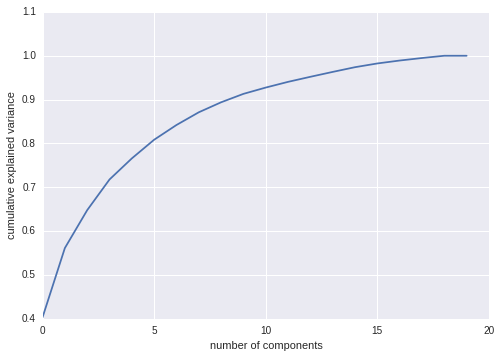

In [23]:
pca = PCA().fit(bush)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Here we see that our two-dimensional projection loses a lot of information (as measured by the explained variance) and that we'd need about 20 components to retain 90% of the variance.  Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in multiple observations.

### PCA as data compression

One thing PCA can be used for is a sort of data compression. Using a small ``n_components`` allows you to represent a high dimensional point as a sum of just a few principal vectors.

Here's what a single digit looks like as you change the number of components:

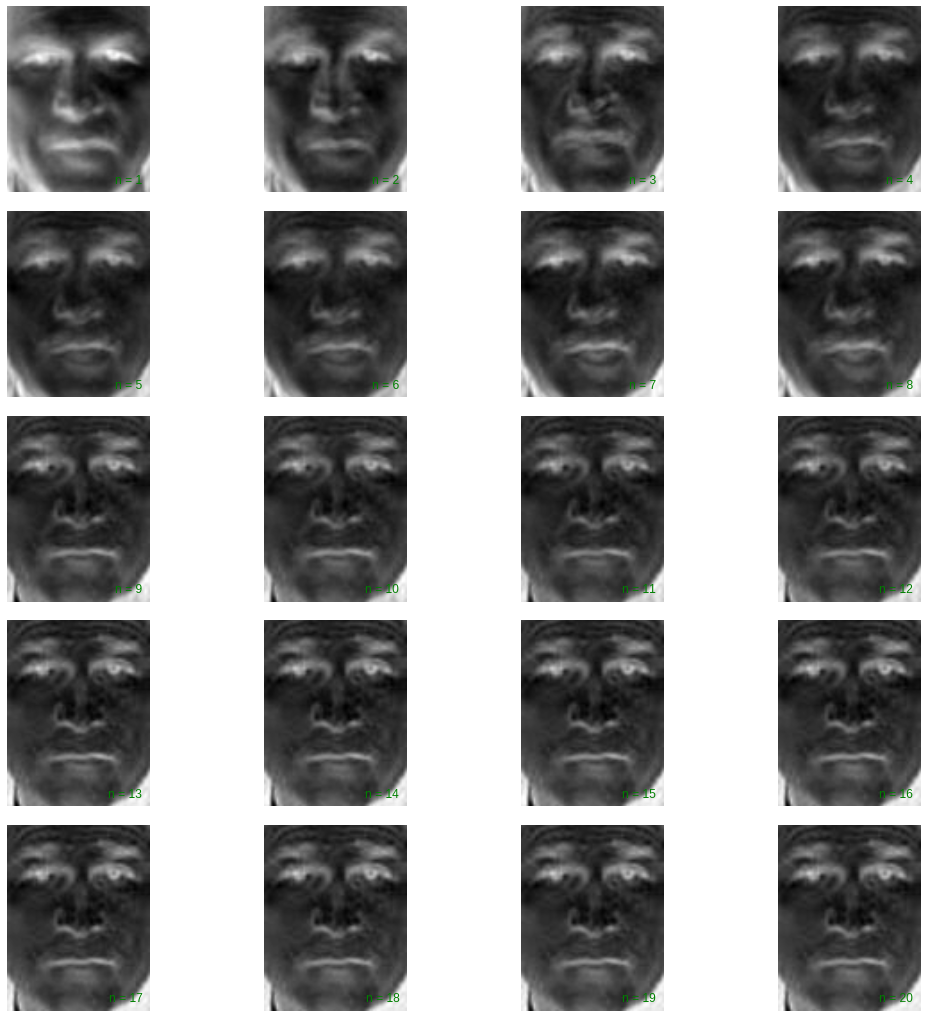

In [24]:
fig, axes = plt.subplots(5, 4, figsize=(18, 18))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
k=4
for i, ax in enumerate(axes.flat):
    pca = PCA(i + 1).fit(bush)
    im = pca.inverse_transform(pca.transform(bush[k:k+1]))

    ax.imshow(im.reshape((105, 80)), cmap='binary')
    ax.text(0.95, 0.05, 'n = {0}'.format(i + 1), ha='right',
            transform=ax.transAxes, color='green')
    ax.set_xticks([])
    ax.set_yticks([])

<function matplotlib.pyplot.show>

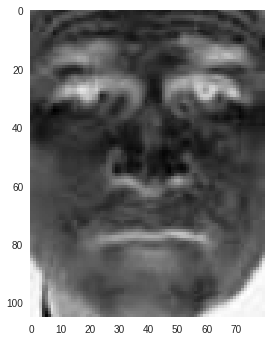

In [25]:
plt.imshow(bushim[k],interpolation='nearest')
plt.grid(False)
plt.show

Full function from http://www.janeriksolem.net/2009/01/pca-for-images-using-python.html

In [26]:
from PIL import Image
from numpy import *

def pca(X):
  # Principal Component Analysis
  # input: X, matrix with training data as flattened arrays in rows
  # return: projection matrix (with important dimensions first),
  # variance and mean

  #get dimensions
  num_data,dim = X.shape

  #center data
  mean_X = X.mean(axis=0)
  for i in range(num_data):
      X[i] -= mean_X

  if dim>100:
      print 'PCA - compact trick used'
      M = dot(X,X.T) #covariance matrix
      e,EV = linalg.eigh(M) #eigenvalues and eigenvectors
      tmp = dot(X.T,EV).T #this is the compact trick
      V = tmp[::-1] #reverse since last eigenvectors are the ones we want
      S = sqrt(e)[::-1] #reverse since eigenvalues are in increasing order
  else:
      print 'PCA - SVD used'
      U,S,V = linalg.svd(X)
      V = V[:num_data] #only makes sense to return the first num_data

  #return the projection matrix, the variance and the mean
  return V,S,mean_X



#perform PCA


PCA - compact trick used


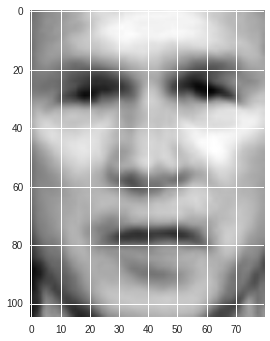

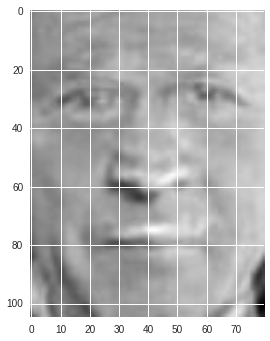

In [27]:
import pylab
m,n = bushim[0].shape

V,S,immean = pca(bush)

#mean image and first mode of variation
immean = immean.reshape(m,n)
mode = V[0].reshape(m,n)

#show the images
pylab.figure()
pylab.gray()
pylab.imshow(immean)

pylab.figure()
pylab.gray()
pylab.imshow(mode)

pylab.show()